In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import silhouette_score   #To calculate the best n_clusters for KMeans Clustering (Refer: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [0]:
sns.set_style(style = "whitegrid")

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/PCA/wine.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
#"Type" is the cluster labels already assigned in the dataset.
#Hence removing them and assigning them to a variable.
data["Type"].unique()

y = data["Type"]
data.drop(labels = "Type", inplace = True, axis = 1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol            178 non-null float64
Malic              178 non-null float64
Ash                178 non-null float64
Alcalinity         178 non-null float64
Magnesium          178 non-null int64
Phenols            178 non-null float64
Flavanoids         178 non-null float64
Nonflavanoids      178 non-null float64
Proanthocyanins    178 non-null float64
Color              178 non-null float64
Hue                178 non-null float64
Dilution           178 non-null float64
Proline            178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [0]:
#Checking for NULL values.
data.isnull().any() #No NULL values are present.

Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

In [0]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
data.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [0]:
#Standardizing the dataset

ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(data), columns = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])

In [0]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [0]:
#Performing Principal Component Analysis to do analysis on 3 Principal Components.

pca = PCA()
principalcomponents = pca.fit_transform(data)

In [0]:
PC = pd.DataFrame(principalcomponents)

In [0]:
variance_ratio = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Variance Ratio vs Principal Components')

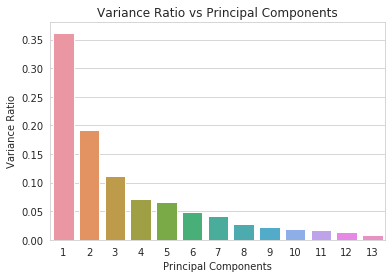

In [0]:
sns.barplot(x= list(range(1,len(variance_ratio)+1)), y = variance_ratio)
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Ratio vs Principal Components")  #Looking at the graph, we can see that 65% of information is covered by first 3 principal components.

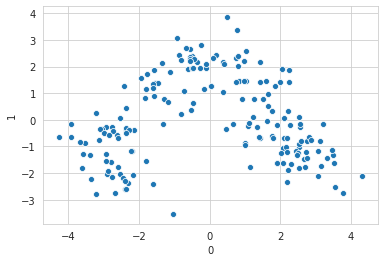

In [0]:
sns.scatterplot(PC[0], PC[1])

##Applying Agglomerative Clustering with PCA.

####Plotting Dendrogram to know the optimal number of clusters.

Text(0.5, 1.0, 'Dendrogram')

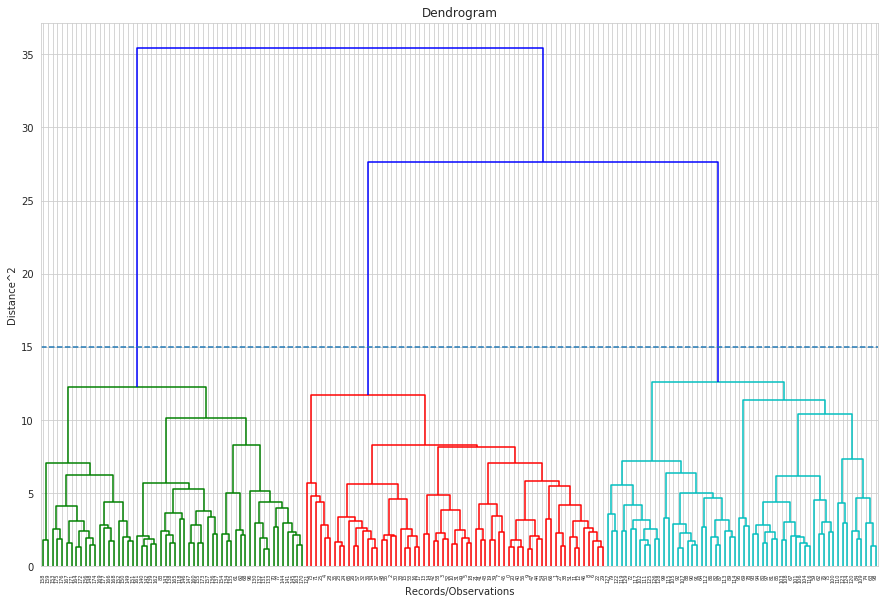

In [0]:
#Plotting a Dendrogram with "ward" linkage to determine ideal number of clusters
#for Agglomerative/Hierarchical Clustering. 

plt.figure(figsize = (15,10))
link = linkage(PC, method = "ward")
dend = dendrogram(link)
plt.axhline(y = 15, linestyle = "--")
plt.xlabel("Records/Observations")
plt.ylabel("Distance^2")  #Distance square because we are using "ward" as a linkage.
plt.title("Dendrogram")

In [0]:
#Applying Hierarchical Clustering with first 3 Principal Components.
#Performing Agglomerative/Hierarchical Clustering on Dimension reduced dataset.
agg = AgglomerativeClustering(n_clusters = 3)
agg.fit(PC.iloc[:,0:3])

agg_labels = list(agg.labels_)

Text(0.5, 1.0, 'Scatter Plot')

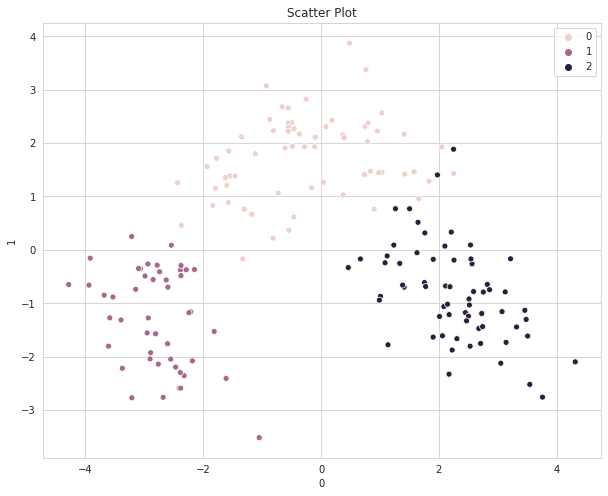

In [0]:
#Plotting scatter plot.
plt.figure(figsize = (10,8))
sns.scatterplot(PC[0],PC[1], hue = agg_labels)
plt.title("Scatter Plot")

In [0]:
PC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


##Applying KMeans Clustering with PCA.

In [0]:
#Applying K-Means Clustering with first 3 Principal Component

inertia = []
pred = {}
for k in range(1,10):
  kc = KMeans(n_clusters = k, max_iter = 300, random_state = 42)
  kc.fit(PC.iloc[:,0:3])  
  pred.update({k : kc.fit_predict(PC.iloc[:,0:3])})

  inertia.append(kc.inertia_)

Text(0.5, 1.0, 'SSD vs number of clusters')

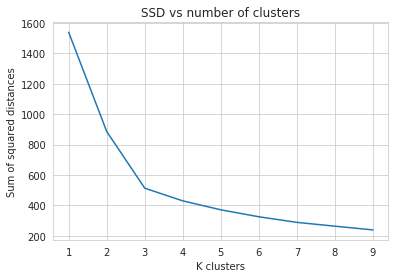

In [0]:
#Elbow curve for KMeans clustering

sns.lineplot(x = list(range(1,10)), y = inertia )
plt.xlabel("K clusters")
plt.ylabel("Sum of squared distances")
plt.title("SSD vs number of clusters")    # Looking at the graph, we can take clusters from 2 to 4.

In [0]:
#Calculating Silhouette Score to find out an optimal n_cluster value
for k in list(range(2,10)):
  ss = silhouette_score(PC.iloc[:,0:3], pred[k], random_state = 42)
  print("Silhouette score for: ", k, "Clusters: ", ss)

Silhouette score for:  2 Clusters:  0.389388130890033
Silhouette score for:  3 Clusters:  0.45379998482576134
Silhouette score for:  4 Clusters:  0.4106780309460923
Silhouette score for:  5 Clusters:  0.379668834541928
Silhouette score for:  6 Clusters:  0.3077674131057237
Silhouette score for:  7 Clusters:  0.32401371341360935
Silhouette score for:  8 Clusters:  0.29964389603190816
Silhouette score for:  9 Clusters:  0.3118149821139544




*   Looking at the Silhouette score, we can say that 3 clusters seems to be a good choice for clustering.




In [0]:
#USD function for KMeans for different value of k.
def scatter_plot(k):
  kc = KMeans(n_clusters = k, max_iter = 300, random_state = 42)
  kc.fit(PC.iloc[:,0:3])
  kc.predict(PC.iloc[:,0:3])
  y_1 = kc.labels_
  
  return y_1

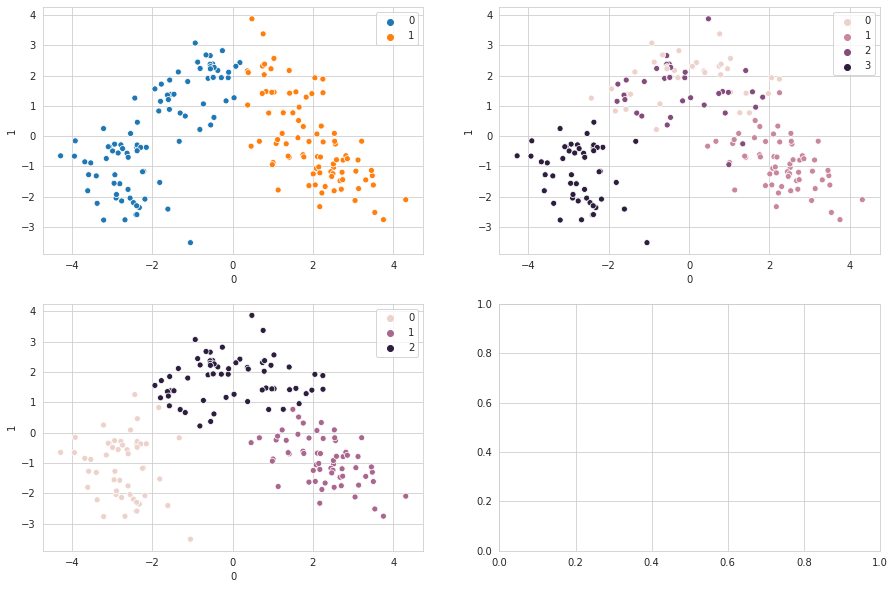

In [0]:
#Plotting Scatter plots to determine the number of clusters.

fig, ax = plt.subplots(2, 2, figsize = (15,10))
k = 2
for i in range(0,2):
  for j in range(0,2):
    if int(k) < 5:
      y_1 = scatter_plot(k)
      k+=1
      sns.scatterplot(PC[0], PC[1], hue = y_1, ax = ax[j][i])

##Observation

*   Looking at the graph, we can see three clusters segregates the data sufficiently.

